# 2 - Reading an IDF file

As before, load the pyIBA library

In [1]:
# if pyIBA has been installed with pip3,
# the above 4 lines can be removed
import sys
from os.path import abspath
path_pyIBA = abspath('../../../..')
sys.path.insert(0, path_pyIBA)

# import pyIBA
from pyIBA import IDF

## Loading the file

[Example 1 - Creating a blank IDF](../Example1/blank_idf.ipynb) demonstrated how to create an IDF file from raw data. Here we show how to edit/inspect an exiting IDF file. We use the file created previously:

In [2]:
file_path = '../Example1/idf_example1.xml'

and load it when creating the IDF object:

In [3]:
idf_file = IDF(file_path)

All the information included in the IDF object created on the previous example ([1 - Creating a blank IDF](../Example1/blank_idf.ipynb)) is now in the `idf_file` object.

## The notes

Perhaps the first thing to read are the notes:

In [4]:
notes = idf_file.get_notes()

for note in notes:
    print(note)
    
print('Created by', idf_file.get_user())

This file was created during Example 1, it relates to a RBS measurement of a CoPt/SiO2 sample.
Something I did after the first note
Created by Miguel Sequeira


## The beam parameters

To get the entire set of beam parameters, we can use the `idf_file.get_geo_parameters()`:

In [5]:
idf_file.get_geo_parameters()

{'mode': 19,
 'window': [100, 1500],
 'projectile': '4He',
 'beam_energy': 2000.0,
 'beam_FWHM': 20.0,
 'geometry': 'IBM',
 'angles': ['30', '140'],
 'dect_solid': '11',
 'energy_calib': [2.28, 105.5],
 'charge': '5'}

Note that each of this parameters can be obtained individually. For instance, the beam energy and FWHM we can be retrieved using

In [6]:
energy, FWHM = idf_file.get_beam_energy()

print('Energy: %0.1f keV' %energy)
print('FWHM  : %0.1f keV' %FWHM)

Energy: 2000.0 keV
FWHM  : 20.0 keV


or, similarly, for the geometry of the experiment:

In [7]:
idf_file.get_geometry_type()

('IBM', ['30', '140'], None)

Please refer to `help(idf_file.get_geo_parameters)` to find all the individual methods

In [8]:
help(idf_file.get_geo_parameters)

Help on method get_geo_parameters in module pyIBA.main_idf:

get_geo_parameters(spectra_id=0) method of pyIBA.IDF.IDF instance
    Gets the entire set of parameters in a dictionary with the following format::
            
            params = {
                    'mode': 19,
                    'window': [100, 1500],
                    'projectile': 'He',
                    'beam_energy': 2000,
                    'beam_FWHM': 17,
                    'geometry': 'ibm',
                    'angles': [0, 160], # [incident, scattering]
                    'dect_solid': 7.2,
                    'energy_calib': [1, 0], # [m, b], E = m * channel + b,
                    'charge': 5           
            }
    
    Each of these parameters can be obtained individually using the appropriate methods::
    
            params['window']= [self.get_window_min(), self.get_window_max()]
            params['projectile'] = self.get_beam_particles()
            params['beam_energy'], params['beam_F

## The spectrum

To get the spectrum from the file, you simple need to run:

In [9]:
xx, yy = idf_file.get_dataxy()

Now, for instance if you want to print it using `matplotlib`:

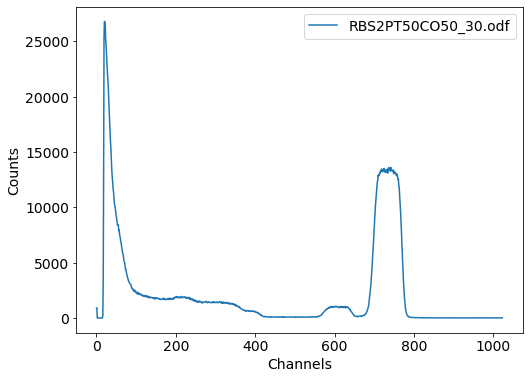

In [10]:
#import matplotlib and increase the font size
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

#get the name of the file to use as label in the plot
name_file = idf_file.get_spectrum_file_name()

#create and plot the spectrum
plt.figure(figsize = (8,6))
plt.plot(xx, yy, label = name_file)

plt.xlabel('Channels')
plt.ylabel('Counts')
plt.legend();

## The sample details

To get the elements in the sample, we run `idf_file.get_elements()` to get a dictionary similar to the one defined in [Example 1 - Creating a blank IDF](../Example1/blank_idf.ipynb#Elements) and used as input in `idf_file.set_elements()`.

In [11]:
idf_file.get_elements()

{'nelements': 3,
 0: {'name': 'Co 1 Pt 1',
  'density': '',
  'concentration': ['0', '1'],
  'depth': ['0', '1000']},
 1: {'name': 'Si 1 O 2',
  'density': '',
  'concentration': ['0', '1'],
  'depth': ['0', '1000']},
 2: {'name': 'Si',
  'density': '',
  'concentration': ['0', '1'],
  'depth': ['300', '1e6']}}

Similarly, to obtain the depth profile of the sample, we use `idf_file.get_profile()` (see [Example 1 - Creating a blank IDF](../Example1/blank_idf.ipynb#Depth-profile)):

In [12]:
idf_file.get_profile()

{'nlayers': 2,
 'names': ['Co 1 Pt 1', 'Si 1 O 2', 'Si'],
 0: {'thickness': '390', 'concentrations': ['100', '0', '0']},
 1: {'thickness': '550', 'concentrations': ['0', '100', '0']},
 2: {'thickness': '4000000', 'concentrations': ['0', '0', '100']}}

## Quick check

If you want to print out the information on the file, in a text fashion (i.e. without possibility of changing the values), you can use `print_idf_file()` (see also [Example 1](../Example1/blank_idf.ipynb#Checking-the-file) and [Example A2](../advanced_examples/Example_a2/IDFViewer_pyIBA.ipynb)).

=============== idf_example1 ===============
../Example1/idf_example1.xml
Miguel Sequeira 

------------------  Notes  ------------------
This file was created during Example 1, it relates to a RBS measurement of a CoPt/SiO2 sample.
Something I did after the first note

------------------ Elements -----------------
nelements 	 3

 - - - Element 0 - - -
name 		 Co 1 Pt 1
density  	 
concentration  	 ['0', '1']
depth 		 ['0', '1000']

 - - - Element 1 - - -
name 		 Si 1 O 2
density  	 
concentration  	 ['0', '1']
depth 		 ['0', '1000']

 - - - Element 2 - - -
name 		 Si
density  	 
concentration  	 ['0', '1']
depth 		 ['300', '1e6']

------------------ Profile -----------------
nlayers 		 2
names 		 ['Co 1 Pt 1', 'Si 1 O 2', 'Si']

 - - - Layer 0 - - -
thickness 		 390
concentrations  	 ['100', '0', '0']

 - - - Layer 1 - - -
thickness 		 550
concentrations  	 ['0', '100', '0']

 - - - Layer 2 - - -
thickness 		 4000000
concentrations  	 ['0', '0', '100']



-------- Spectrum 0 (RBS2PT50

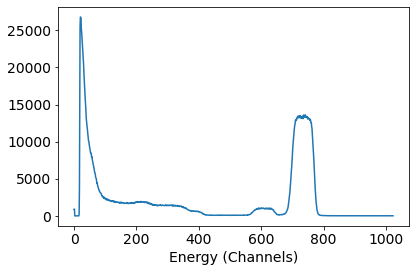

In [13]:
idf_file.print_idf_file()